In [1]:
"""
Adapted from UChicago Open Data's project on Internet Accessibility in Illinois.
"""

"\nAdapted from UChicago Open Data's project on Internet Accessibility in Illinois.\n"

In [2]:
%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text


In [3]:
tiles_url = 'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2022/quarter%3D1/2022-01-01_performance_fixed_tiles.zip'
# Average internet speeds (kbps) in U.S. counties. Taken from Ookla.
tiles = gp.read_file(tiles_url)

In [4]:
tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,3003012022320302,53192,31809,15,125,37,"POLYGON ((28.32275 -25.74548, 28.32825 -25.745..."
1,1231331000100000,21486,15258,13,4,1,"POLYGON ((87.36328 27.05913, 87.36877 27.05913..."
2,0323200012222203,57701,19042,12,228,67,"POLYGON ((-66.79138 10.50402, -66.78589 10.504..."
3,1321001313111333,153438,41591,19,21,7,"POLYGON ((118.11951 39.60992, 118.12500 39.609..."
4,1230222100110001,89316,44292,5,52,21,"POLYGON ((46.67542 24.52713, 46.68091 24.52713..."
...,...,...,...,...,...,...,...
6742519,0302230233130010,50959,7133,23,1,1,"POLYGON ((-83.04565 43.26121, -83.04016 43.261..."
6742520,3130100010322330,702,326,56,2,1,"POLYGON ((147.16187 -41.23651, 147.16736 -41.2..."
6742521,2103111221111221,11248,804,603,3,1,"POLYGON ((-47.14783 -23.91597, -47.14233 -23.9..."
6742522,1330001113122023,37376,88543,42,27,1,"POLYGON ((140.45471 40.60144, 140.46021 40.601..."


In [5]:
county_url = "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip"
# Counties in the U.S. taken from the Census Burea's website.
counties = gp.read_file(county_url)

In [6]:
ca_counties = counties.loc[counties['STATEFP'] == '06'].to_crs(4326) 
# Selects counties in California (STATEFP = 06) and converts the shapestx to ESPG:4326, an ellipsoid projection of Earth. 

In [7]:
ca_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
8,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694583,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.65559 39.69356, -120.65552 39.6..."
325,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499983887,75425434,+38.4500161,-121.3404408,"POLYGON ((-121.18857 38.71431, -121.18731 38.7..."
329,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084063392,2729751706,+34.5370572,-120.0399729,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343..."
346,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641784992,43841871,+38.1838996,-120.5614415,"POLYGON ((-120.63093 38.34110, -120.63057 38.3..."
394,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4771987962,947345370,+34.3587415,-119.1331432,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292..."
397,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,31080,31084,A,10511861492,1793485467,+34.1963983,-118.2618616,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
455,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,4080764059,498182342,+38.5251824,-122.9261095,"POLYGON ((-122.93506 38.31395, -122.93509 38.3..."
538,06,031,00277280,06031,Kings,Kings County,06,H1,G4020,260,25260,None,A,3600883803,3162664,+36.0724780,-119.8155301,"POLYGON ((-119.95892 36.25547, -119.95893 36.2..."
539,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,41740,None,A,10904373558,817404622,+33.0236041,-116.7761174,"POLYGON ((-117.43743 33.17953, -117.44954 33.1..."
552,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644306246,246466620,+39.0620323,-120.7227181,"POLYGON ((-121.06544 39.00653, -121.06537 39.0..."


In [8]:
tiles_in_ca_counties = gp.sjoin(tiles, ca_counties, how="inner", predicate='intersects')
# Places shape tiles within the named counties based off of their geometry.

/var/folders/yd/zy6k87rx7t1ccsy6bbgljvym0000gn/T/ipykernel_13653/1683857584.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...
Right CRS: EPSG:4326

  tiles_in_ca_counties = gp.sjoin(tiles, ca_counties, how="inner", predicate='intersects')


tiles_in_il_counties = gp.sjoin(tiles, il_counties, how="inner", op='intersects')


In [9]:
tiles_in_ca_counties['avg_d_mbps'] = tiles_in_ca_counties['avg_d_kbps'] / 1000
tiles_in_ca_counties['avg_u_mbps'] = tiles_in_ca_counties['avg_u_kbps'] / 1000

In [10]:
tiles_in_ca_counties.to_csv('ca_speed_tests22q1.csv')

In [11]:
tiles_in_ca_counties

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,STATEFP,COUNTYFP,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,avg_d_mbps,avg_u_mbps
10,0230132002203230,116408,42758,16,30,21,"POLYGON ((-118.07007 33.80654, -118.06458 33.8...",2552,06,059,...,348,31080,11244,A,2053367783,401931862,+33.6756872,-117.7772068,116.408,42.758
211,0230132020130312,270444,166292,6,361,37,"POLYGON ((-117.82837 33.62834, -117.82288 33.6...",2552,06,059,...,348,31080,11244,A,2053367783,401931862,+33.6756872,-117.7772068,270.444,166.292
954,0230132002332013,211729,32292,16,106,29,"POLYGON ((-117.84485 33.75632, -117.83936 33.7...",2552,06,059,...,348,31080,11244,A,2053367783,401931862,+33.6756872,-117.7772068,211.729,32.292
2549,0230132002121102,96916,21459,12,22,4,"POLYGON ((-117.88330 33.93880, -117.87781 33.9...",2552,06,059,...,348,31080,11244,A,2053367783,401931862,+33.6756872,-117.7772068,96.916,21.459
2847,0230132002033120,131009,10875,28,37,12,"POLYGON ((-117.97119 33.89778, -117.96570 33.8...",2552,06,059,...,348,31080,11244,A,2053367783,401931862,+33.6756872,-117.7772068,131.009,10.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410974,0230101233230222,265701,11874,51,1,1,"POLYGON ((-119.79492 38.86110, -119.78943 38.8...",1316,06,003,...,None,None,None,A,1912292608,12557304,+38.6217831,-119.7983522,265.701,11.874
6429957,0230103011002312,359923,22303,12,1,1,"POLYGON ((-119.84985 38.76693, -119.84436 38.7...",1316,06,003,...,None,None,None,A,1912292608,12557304,+38.6217831,-119.7983522,359.923,22.303
6549795,0230101233221033,97398,11170,10,6,2,"POLYGON ((-119.82239 38.87820, -119.81689 38.8...",1316,06,003,...,None,None,None,A,1912292608,12557304,+38.6217831,-119.7983522,97.398,11.170
6600967,0230103010033321,62112,61550,4,6,2,"POLYGON ((-120.07507 38.69409, -120.06958 38.6...",1316,06,003,...,None,None,None,A,1912292608,12557304,+38.6217831,-119.7983522,62.112,61.550


In [12]:
county_stats = (
    tiles_in_ca_counties.groupby(["GEOID", "NAMELSAD"])
    .apply(
        lambda x: pd.Series(
            {"avg_d_mbps_wt": np.average(x["avg_d_mbps"], weights=x["tests"])}
        )
    )
    .reset_index()
    .merge(
        tiles_in_ca_counties.groupby(["GEOID", "NAMELSAD"])
        .agg(tests=("tests", "sum"))
        .reset_index(),
        on=["GEOID", "NAMELSAD"],
    )
)
# Collects all tests and groups them by counties, producing an average mbps for each county. 

In [23]:
county_stats.sort_values('avg_d_mbps_wt', ascending=False).head(20)

,GEOID,NAMELSAD,avg_d_mbps_wt,tests
40,06081,San Mateo County,242.585199,77233
6,06013,Contra Costa County,242.285538,87471
50,06101,Sutter County,238.773510,3703
0,06001,Alameda County,233.618349,137043
38,06077,San Joaquin County,232.736184,41577
15,06031,Kings County,228.478284,5373
47,06095,Solano County,228.276212,25523
33,06067,Sacramento County,227.997271,95356
42,06085,Santa Clara County,227.891324,195437
9,06019,Fresno County,220.523441,42588


In [14]:
county_data = ca_counties[['GEOID', 'geometry']].merge(county_stats, on='GEOID').to_crs(26916)
# Merges county internet stats with country geometry.

In [15]:
labels = ["0 to 25 Mbps", "25 to 50 Mbps", "50 to 100 Mbps", "100 to 150 Mbps", "150 to 200 Mbps", "200+ Mbps"]

county_data['group'] = pd.cut(
    county_data.avg_d_mbps_wt, 
    (0, 25, 50, 100, 150, 200, 500), 
    right=False, 
    labels = labels
)

In [16]:
ca_pop_areas = gp.read_file("ftp://ftp2.census.gov/geo/tiger/TIGER2019/PLACE/tl_2019_06_place.zip")
ca_pop_areas
# Census recognized places in California.

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,66140,02411785,0666140,San Fernando,San Fernando city,25,C1,N,N,G4110,A,6148696,0,+34.2886519,-118.4362413,"POLYGON ((-118.45601 34.28490, -118.45414 34.2..."
1,06,14190,02409487,0614190,Cloverdale,Cloverdale city,25,C1,N,N,G4110,A,8107251,0,+38.7961433,-123.0150596,"POLYGON ((-123.03511 38.78701, -123.03509 38.7..."
2,06,16560,02410240,0616560,Cotati,Cotati city,25,C1,N,N,G4110,A,4869301,8380,+38.3284920,-122.7100491,"POLYGON ((-122.72960 38.33349, -122.72951 38.3..."
3,06,65042,02411779,0665042,San Buenaventura (Ventura),San Buenaventura (Ventura) city,25,C1,Y,N,G4110,A,56675175,26959120,+34.2677796,-119.2542062,"MULTIPOLYGON (((-119.29710 34.34463, -119.2970..."
4,06,30014,02410601,0630014,Glendora,Glendora city,25,C1,N,N,G4110,A,50527933,400123,+34.1449643,-117.8478035,"POLYGON ((-117.89005 34.14675, -117.89005 34.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,06,84480,02409574,0684480,Westley,Westley CDP,57,U1,N,N,G4210,S,935222,0,+37.5443922,-121.2034743,"POLYGON ((-121.21023 37.54389, -121.20229 37.5..."
1517,06,84578,02409556,0684578,West Modesto,West Modesto CDP,57,U1,N,N,G4210,S,3692939,37069,+37.6175188,-121.0328278,"POLYGON ((-121.05327 37.61760, -121.05241 37.6..."
1518,06,84536,02409555,0684536,West Menlo Park,West Menlo Park CDP,57,U1,N,N,G4210,S,1260852,0,+37.4337899,-122.2034156,"POLYGON ((-122.21372 37.43301, -122.21287 37.4..."
1519,06,84863,02628800,0684863,Westside,Westside CDP,57,U1,N,N,G4210,S,5740778,0,+36.4042015,-120.1343258,"POLYGON ((-120.14752 36.39370, -120.14746 36.3..."


In [17]:
ca_pop_areas = ca_pop_areas.loc[ca_pop_areas['NAME'].isin(['Los Angeles', 'Sacramento', 'San Diego', 'Orange',
                                                  'Riverside', 'San Bernadino', 'Santa Clara', 'Alameda',
                                                 'Contra Costa', 'Fresno', 'Kern', 'Ventura', 'San Francisco'])].to_crs(26916)
# 11 most populated counties in California.
ca_pop_areas

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
29,06,44000,02410877,0644000,Los Angeles,Los Angeles city,25,C1,Y,N,G4110,A,1214591312,87468461,+34.0193936,-118.4108248,"POLYGON ((-2469098.332 4274427.824, -2469046.5..."
54,06,62000,02410965,0662000,Riverside,Riverside city,25,C1,Y,N,G4110,A,210458338,801713,+33.9381433,-117.3931675,"POLYGON ((-2367878.674 4208935.420, -2367859.6..."
67,06,69084,02411816,0669084,Santa Clara,Santa Clara city,25,C1,Y,N,G4110,A,47203923,0,+37.3644960,-121.9680105,"POLYGON ((-2643829.977 4758340.916, -2643783.8..."
181,06,67000,02411786,0667000,San Francisco,San Francisco city,25,C1,Y,N,G4110,A,121477743,479114582,+37.7272391,-123.0322294,"MULTIPOLYGON (((-2675086.945 4838189.217, -267..."
248,06,53980,02411325,0653980,Orange,Orange city,25,C1,Y,N,G4110,A,66474217,386916,+33.8287597,-117.7851090,"POLYGON ((-2410900.345 4202821.224, -2410887.5..."
288,06,66000,02411782,0666000,San Diego,San Diego city,25,C1,Y,N,G4110,A,844018494,120537242,+32.8149770,-117.1355615,"MULTIPOLYGON (((-2358515.405 4039123.250, -235..."
306,06,00562,02409669,0600562,Alameda,Alameda city,25,C1,N,N,G4110,A,27062002,32761823,+37.7419107,-122.2599139,"POLYGON ((-2651092.840 4825846.301, -2650512.5..."
336,06,27000,02410546,0627000,Fresno,Fresno city,25,C1,Y,N,G4110,A,297135527,3127481,+36.7826736,-119.7944920,"MULTIPOLYGON (((-2456113.205 4606723.546, -245..."
439,06,64000,02411751,0664000,Sacramento,Sacramento city,25,C1,Y,N,G4110,A,253119438,5591298,+38.5665924,-121.4686318,"POLYGON ((-2538644.582 4892923.937, -2538630.2..."


In [18]:
ca_pop_areas["centroid"] = ca_pop_areas["geometry"].centroid
ca_pop_areas.set_geometry("centroid", inplace = True)

In [19]:
county_data.loc[county_data.NAMELSAD == "Los Angeles County"]

,GEOID,geometry,NAMELSAD,avg_d_mbps_wt,tests,group
5,06037,"MULTIPOLYGON (((-2473363.104 4273134.480, -247...",Los Angeles County,213.216819,708303,200+ Mbps


1

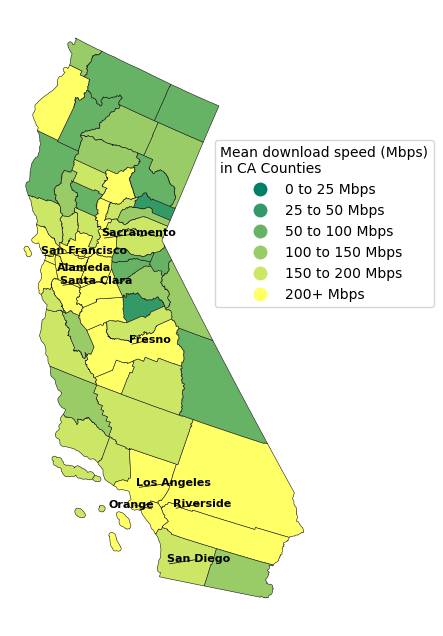

In [20]:
fig, ax = plt.subplots(1, figsize=(20, 8))

county_data.plot(
    column="group", cmap="summer", linewidth=0.4, ax=ax, edgecolor="0.1", legend=True
)

ax.axis("off")

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8))
leg.set_title("Mean download speed (Mbps)\nin CA Counties")

texts = []
for x, y, label in zip(ca_pop_areas.geometry.x, ca_pop_areas.geometry.y, ca_pop_areas["NAME"]):
    texts.append(plt.text(x, y, label, fontsize=8, fontweight="bold", ha="right"))

adjust_text(
    texts,
    force_points=0.3,
    force_text=0.8,
    expand_points=(1, 1),
    expand_text=(1, 1),
    arrowprops=dict(arrowstyle="-", color="black", lw=0.5),
)

# Plots the data onto a map of California, shading based on the average mbps of the county.